In [ ]:
!pip install tensorflow==2.12.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: gast
    Found existing installation: gast 0.6.0
    U

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
tf.__version__

'2.12.0'

In [ ]:
#The left side of the assignment destructures the returned tuples from load_data().
# X_train: This is the training dataset containing the images of the handwritten digits.
#It will be a NumPy array of shape (60000, 28, 28) where 60,000 is the number of training samples,
#and 28x28 is the resolution of each image. y_train: This is the training labels corresponding to X_train.
#It contains the digit labels (0-9) for each image, with shape (60000,). (,): This part is used to ignore the test data.
#The underscore () is a convention to signify that the value is being ignored. So, you're not storing X_test and y_test in this case.


In [ ]:
(X_train, y_train), (_,_) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
28 *28

784

In [ ]:
y_train.shape

(60000,)

2


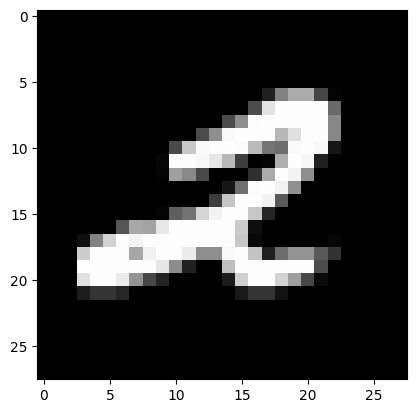

In [ ]:
i = np.random.randint(0,60000)
#print(i)
print(y_train[i])
plt.imshow(X_train[i],cmap='gray')

Converting your data into float format

In [ ]:
X_train=X_train.reshape(X_train.shape[0],28,28,1).astype('float32')

In [ ]:
X_train.shape

(60000, 28, 28, 1)

TO check the Normalization range use used min() and max() functions

In [ ]:
X_train[0].min(),X_train[0].max()

(0.0, 255.0)

In [ ]:
X_train = (X_train - 127.5) /127.5

In [ ]:
X_train[0].min(),X_train[0].max()

(-1.0, 1.0)

In [ ]:
buffer_size  = 60000
batch_size = 256

In [ ]:
buffer_size/batch_size

234.375

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
X_train = tf.data.Dataset.from_tensor_slices(X_train).shuffle(buffer_size).batch(batch_size)

##### **Transform X_train(Which is typically a large dataset) into a tf.data.Dataset object, Shuffles the data with buffer size of buffer_sizeand group it into batches of size small batch_size**.

In [ ]:
type(X_train)

tensorflow.python.data.ops.batch_op._BatchDataset

In [ ]:
X_train

<_BatchDataset element_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None)>

**Building the Generator**



*   Batch Normalization
*   Activation Function
*   Leack Relu
*   Logistic Regression





In [ ]:
def build_generator( ):
    # Create a sequential model, where layers are added in order
    network = tf.keras.Sequential()

    # Add a Dense layer (fully connected) with 7x7x256 units, no bias, input shape is (100,)
    network.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))

    # Batch normalization to stabilize and speed up training
    network.add(layers.BatchNormalization())

    # LeakyReLU activation to allow small gradients when the input is negative
    network.add(layers.LeakyReLU())

    # Reshape the output to a 3D shape (7x7x256) for further convolutional operations
    network.add(layers.Reshape((7,7,256)))

    # Add a Conv2DTranspose layer with 128 filters, kernel size 5x5, stride 1, and same padding
    network.add(layers.Conv2DTranspose(filters=128, kernel_size=(5,5), strides=(1,1), padding='same', use_bias=False))

    # Batch normalization again to normalize and stabilize the outputs
    network.add(layers.BatchNormalization())

    # LeakyReLU activation again to add non-linearity
    network.add(layers.LeakyReLU())

    # Add another Conv2DTranspose layer, this time with 64 filters, kernel size 5x5, stride 2 to upsample the output to 14x14
    network.add(layers.Conv2DTranspose(filters=64, kernel_size=(5,5), strides=(2,2), padding='same', use_bias=False))

    # Batch normalization again
    network.add(layers.BatchNormalization())

    # Another LeakyReLU activation
    network.add(layers.LeakyReLU())

    # Final Conv2DTranspose layer with 1 filter (for grayscale images), kernel size 5x5, stride 2 to upsample to 28x28
    # 'tanh' activation to scale the output to the range [-1, 1]
    network.add(layers.Conv2DTranspose(filters=1, kernel_size=(5,5), strides=(2,2), padding='same', use_bias=False, activation='tanh'))

    # Print out the summary of the network
    network.summary()

    # Return the built generator model
    return network


In [ ]:
generator = build_generator()
#called build_generator()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 12544)             1254400   
                                                                 
 batch_normalization_2 (Batc  (None, 12544)            50176     
 hNormalization)                                                 
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 12544)             0         
                                                                 
 reshape_2 (Reshape)         (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 7, 7, 128)        819200    
 nspose)                                                         
                                                                 
 batch_normalization_3 (Batc  (None, 7, 7, 128)       

Here's a simpler explanation of the model summary:

- The input is a vector of size 100.
- The model processes this input through multiple layers to eventually generate a 28x28 grayscale image.

#### Key Layers:
1. Dense Layer : Expands the input to a large vector (12544 units) to prepare for reshaping.
2. Reshape Layer : Reshapes the large vector into a 3D tensor (7x7x256).
3. Conv2DTranspose Layers : These layers upsample the image step by step, making it larger:
   - First upsample to 7x7 with 128 filters.
   - Then to 14x14 with 64 filters.
   - Finally to 28x28 with 1 filter (grayscale image).
  
#### Total Parameters:
- **2,330,944 parameters** are in the model, which includes the weights and biases that the network learns during training.

In short: This model takes random noise as input and generates a 28x28 grayscale image through multiple upsampling layers.

In [ ]:
noise = tf.random.normal([1,100])
noise

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[-0.4931432 ,  1.3318883 ,  1.5625049 , -1.8347037 ,  0.8362966 ,
        -0.19172023, -0.7584063 ,  0.40880838,  1.209631  , -1.6587349 ,
         0.3906409 , -0.9634655 , -1.4772363 ,  0.20666058,  0.97818774,
        -0.78248906,  0.2812953 ,  1.0786891 ,  0.419124  , -0.5510388 ,
        -0.2739024 , -0.06364823,  0.29337665, -0.3775334 , -0.2006344 ,
        -0.22455971,  0.06455678,  0.27974463, -0.5879332 ,  0.54805434,
        -1.0268654 , -0.2617611 ,  1.295008  , -1.1754485 ,  1.2735236 ,
        -1.147968  , -2.1221185 ,  1.4807112 , -0.15153125,  0.9257832 ,
         1.8652271 ,  0.8610492 , -0.1263358 , -0.5896859 , -0.16083856,
         0.09359029, -0.09781485,  1.027121  , -0.40362704,  0.22603656,
        -1.252894  ,  0.17072736,  1.2672948 ,  0.5165917 ,  0.18443543,
        -2.8058016 ,  0.3494912 , -0.30040234,  0.4382055 ,  0.56342024,
        -0.09983806,  1.2009501 , -0.30887496, -0.08644882,  0.42566228,
 

This line generates a random noise vector of shape [1, 100].
[1, 100] means it's a single vector with 100 random values.
tf.random.normal generates these values from a normal distribution (with a mean of 0 and a standard deviation of 1).

**Purpose**:

This random noise is typically used as the input to a generator model (like in a GAN) to create synthetic data, such as images.

In [ ]:
generated_image = generator(noise,training=False)

In [ ]:
generated_image.shape

TensorShape([1, 28, 28, 1])

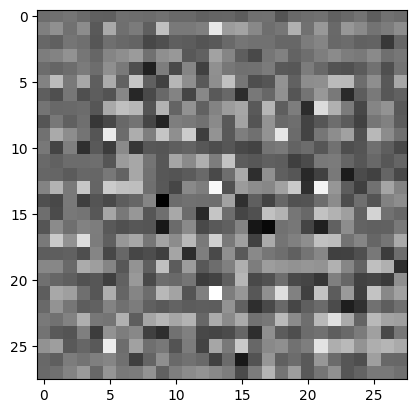

In [ ]:
plt.imshow(generated_image[0,:,:,0],cmap='gray')

**Building the Discriminator**
*   Dropout: https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf
*   Conv2D: https://stackoverflow.com/questions/68976745/in-keras-what-is-the-difference-between-conv2dtranspose-and-conv2d




In [ ]:
def build_discriminator():
    # Create a sequential model for the discriminator
    network = tf.keras.Sequential()

    # First Conv2D layer: extracts features from a 28x28 grayscale image (input shape [28,28,1])
    # Outputs 64 feature maps of size 14x14 (downsampling with stride (2,2))
    network.add(layers.Conv2D(filters=64, strides=(2,2), kernel_size=(5,5), padding='same', input_shape=[28,28,1]))

    # LeakyReLU activation function to allow small negative values for more robust training
    network.add(layers.LeakyReLU())

    # Dropout layer with 30% dropout rate to reduce overfitting
    network.add(layers.Dropout(0.3))

    # Second Conv2D layer: extracts more complex features from 14x14 images
    # Outputs 128 feature maps of size 7x7 (downsampling with stride (2,2))
    network.add(layers.Conv2D(filters=128, strides=(2,2), kernel_size=(5,5), padding='same'))

    # LeakyReLU activation for non-linearity
    network.add(layers.LeakyReLU())

    # Another Dropout layer to reduce overfitting
    network.add(layers.Dropout(0.3))

    # Flatten the 7x7x128 feature maps into a single vector (1D array)
    network.add(layers.Flatten())

    # Dense (fully connected) layer with 1 output value (for binary classification - real or fake)
    network.add(layers.Dense(1))

    # Print a summary of the model's architecture
    network.summary()

    return network


In [ ]:
descriminator = build_discriminator()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 64)        1664      
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 128)         204928    
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 7, 7, 128)         0         
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 128)         0         
                                                                 
 flatten (Flatten)           (None, 6272)             

In [ ]:
descriminator.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv2d_input')>

In [ ]:
descriminator(generated_image,training=False)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.00257958]], dtype=float32)>

In [ ]:
tf.sigmoid(-0.00081761)

<tf.Tensor: shape=(), dtype=float32, numpy=0.4997956>

- `tf.sigmoid(x)` computes the **sigmoid activation** function for the input `x`.
  - The **sigmoid function** is defined as \( \text{sigmoid}(x) = \frac{1}{1 + e^{-x}} \).
  - It transforms any input to a value between 0 and 1.
  
- In this case, the input is `-0.00081761`.
  - For small values close to zero (like this one), the sigmoid output will be **close to 0.5**.

**Purpose:**  
The sigmoid function is commonly used in binary classification tasks to produce a probability (between 0 and 1).